In [143]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
# Sounds like we're just merging stuff.

combined_data = city_data.merge(ride_data, on="city", how="inner")

# Display the data table for preview
#This is a head call

# Loc by city types, that will give us the data on each city type, and then we
# can organize based on what the average fare of each city is

TypeData = combined_data.set_index("type")

UrbanData=TypeData.loc["Urban"]
SuburbanData = TypeData.loc["Suburban"]
RuralData = TypeData.loc["Rural"]

# Now that we have our variables, let's group by the mean so we can get the fare mean
# then we can get each type's fare average, turn it into a list, and plot it later.

# We'll start with Urban
UrbanCityGroup=UrbanData.groupby("city").mean()
UrbanFare=UrbanCityGroup["fare"]
UrbanFarelist=UrbanFare.tolist()

# Then Suburban

SuburbanCityGroup=SuburbanData.groupby("city").mean()
SuburbanFare=SuburbanCityGroup["fare"]
SuburbanFarelist=SuburbanFare.tolist()

# And finally Rural

RuralCityGroup = RuralData.groupby("city").mean()
RuralFare=RuralCityGroup["fare"]
RuralFarelist=RuralFare.tolist()

# Oh let's not forget the ever important driver count:

UrbanGroupSum = UrbanData.groupby("city").sum()
UrbanDriver = UrbanGroupSum["driver_count"]

SuburbanGroupSum=SuburbanData.groupby("city").sum()
SuburbanDriver=SuburbanGroupSum["driver_count"]

RuralGroupSum = RuralData.groupby("city").sum()
RuralDriver=RuralGroupSum["driver_count"]
#len(UrbanFarelist)
#UrbanData
#Top5=purchase_data.loc[purchase_data['SN']


In [144]:
# We also have to form the x-axes for our data, so let's make them for each type
UrbanDrives = UrbanData["city"].value_counts()
SuburbanDrives = SuburbanData["city"].value_counts()
RuralDrives= RuralData["city"].value_counts()

# Failed ideas:

#len(x_axis)
#len(UrbanFare)
#data = UrbanFare
#x_limit = (drivespercity.max()+10)
#x_axis = np.arange(0,x_limit,.1)
#drivespercity.max()

## Bubble Plot of Ride Sharing Data

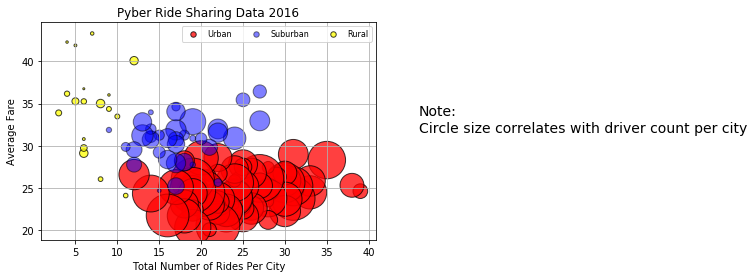

<Figure size 432x288 with 0 Axes>

In [150]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
UrbanScatter = plt.scatter(UrbanDrives, UrbanFarelist, marker="o", facecolors="red",s=UrbanDriver ,edgecolors="black", alpha=0.75)
SuburbanScatter = plt.scatter(SuburbanDrives, SuburbanFarelist, marker = "o", facecolors="blue", s=SuburbanDriver, edgecolors="black", alpha=0.5)
RuralScatter = plt.scatter(RuralDrives, RuralFarelist, marker="o", facecolors="yellow", s=RuralDriver, edgecolors="black", alpha=0.75)
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare")
plt.title("Pyber Ride Sharing Data 2016")
lgnd = plt.legend(("Urban", "Suburban", "Rural"),
           scatterpoints=1,
           loc="upper right",
           ncol=3,
           fontsize=8)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes=[30]
plt.grid()


# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size
plt.text(1, .5, "Note:\nCircle size correlates with driver count per city", fontsize=14, transform=plt.gcf().transFigure)
plt.show()
# Save Figure
plt.savefig("data/PyberRideSharingData.png")

# Failed Ideas
#x_limit = (drivespercity.max())
#x_axis = np.arange(UrbanDrives)


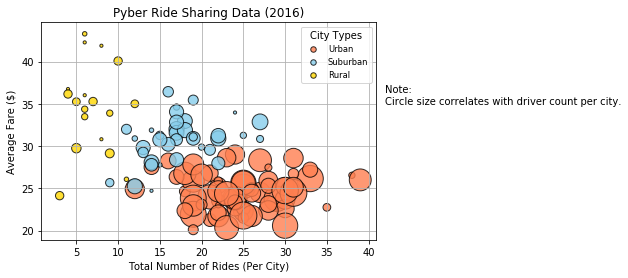

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

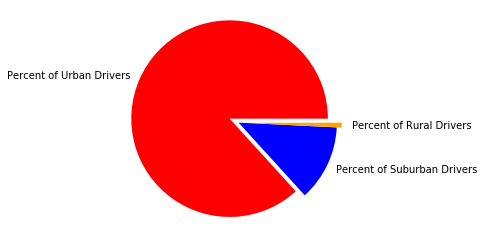

<Figure size 432x288 with 0 Axes>

In [170]:
# Calculate Type Percents
# Let's first find the total number of drivers in the entire data
TotalDrivers = combined_data["driver_count"].sum()

# Then let's find the total number of Urban drivers
# We'll use the groupby for this
TotalUrbanDrivers = UrbanData["driver_count"].sum()
PercentUrbanDrivers = round(TotalUrbanDrivers/TotalDrivers * 100,2)
#print(PercentUrbanDrivers)

# Then we do the same for Suburban
TotalSuburbanDrivers = SuburbanData["driver_count"].sum()
PercentSuburbanDrivers = round(TotalSuburbanDrivers/TotalDrivers * 100,2)
#print(PercentSuburbanDrivers)

# And we do that for Rural
TotalRuralDrivers = RuralData["driver_count"].sum()
PercentRuralDrivers = round(TotalRuralDrivers/TotalDrivers*100,2)
#print(PercentRuralDrivers)

# Build Pie Chart
Percents = [PercentUrbanDrivers, PercentSuburbanDrivers, PercentRuralDrivers]
PercentLabels = ["Percent of Urban Drivers", "Percent of Suburban Drivers", "Percent of Rural Drivers"]
Colors = ["red", "blue", "orange"]

plt.pie(Percents, explode=(.1,0,.05), labels=PercentLabels, colors = Colors, shadow=Tru)
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("data/PyberPieChart.png")

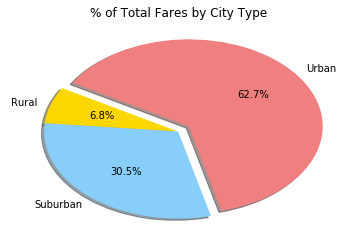

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


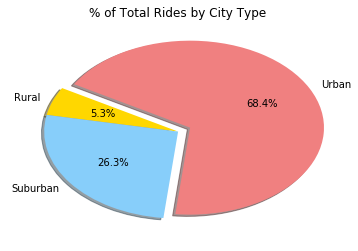

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


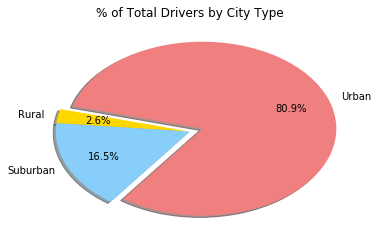

In [6]:
# Show Figure
plt.show()